In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

In [23]:
train_path = './Dataset_2/Train/'
test_path = 'Dataset_2/Test/'
data_dir = './Dataset_2'

train_lable = 'Dataset_2/Train.csv'
test_lable = 'Dataset_2/Test.csv'

In [24]:
NUM_CATEGORIES = len(os.listdir(train_path))
NAME_CATEGORIES = os.listdir(train_path)
print(NUM_CATEGORIES)
print(NAME_CATEGORIES)

43
['12', '16', '19', '32', '28', '30', '40', '24', '4', '2', '14', '38', '9', '20', '3', '41', '7', '0', '17', '39', '34', '22', '33', '8', '42', '1', '5', '27', '31', '26', '10', '25', '35', '6', '36', '15', '37', '23', '21', '18', '11', '29', '13']


In [25]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [26]:
# move resize
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            #列表不够整齐，如果创建多维列表，子列表中的元素得个数一致，如果不一致，那么默认还是一维列表，把子列表当做元素而已
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))      
            imgray = cv2.cvtColor(np.array(resize_image), cv2.COLOR_BGR2GRAY)
            flat_arr=imgray.ravel()
            image_data.append(flat_arr)
            image_labels.append(i)
        except:
            print("Error in " + img)

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values
test_data =[]
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        imgray = cv2.cvtColor(np.array(resize_image), cv2.COLOR_BGR2GRAY)
        flat_arr=imgray.ravel()
        test_data.append(np.array(flat_arr))
    except:
        print("Error in " + img)

In [ ]:
X_test = np.array(test_data)
X_test = X_test/255

In [ ]:
img_dict={"images":np.array(imgray),"data":np.array(image_data),"target":np.array(image_labels)}
train = img_dict['data']/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, img_dict['target'], test_size=0.3, random_state=0, shuffle=True)

# RandomForest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
dtc = dtc.fit(X_train,y_train)
rfc = rfc.fit(X_train,y_train)
score_c = dtc.score(X_val,y_val)
score_r = rfc.score(X_val,y_val)
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

Single Tree:0.7500637592450905 Random Forest:0.9729660800816118


In [ ]:
dtc_pred = dtc.predict(X_test)
rf_pred = rfc.predict(X_test)

#Accuracy with the test data
print('Single Tree Test Data accuracy: ',accuracy_score(labels,dtc_pred))
print('Randomforest Test Data accuracy: ',accuracy_score(labels,rf_pred))

Single Tree Test Data accuracy:  0.5429928741092637
Randomforest Test Data accuracy:  0.7566112430720506


# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train,y_train)
score = gnb.score(X_val,y_val)
print('准确率：',score)

准确率： 0.12173765195953413


In [ ]:
gnb_pred = gnb.predict(X_test)
print('Gaussian naive bayes Test Data accuracy: ',accuracy_score(labels,gnb_pred))

Gaussian naive bayes Test Data accuracy:  0.10577988915281077


### KNN中k=1时，意味着什么？如何解决？

# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",random_state=0)
svc.fit(X_train, y_train)#训练
y_predict = svc.predict(X_val)#预测
print(accuracy_score(y_val, y_predict))#评分

0.9380260137719969


In [ ]:
svc_pred = svc.predict(X_test)
print('SVC Test Data accuracy: ',accuracy_score(labels,svc_pred))

SVC Test Data accuracy:  0.8122723673792558


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [1,3,5,7,9,11,13,15,17]
accuracy_val_knn = []
for k in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction=knn.predict(X_val)
    acc = accuracy_score(y_val,prediction)
    accuracy_val_knn.append(acc)
    print("k = {}, acc = {}".format(k,acc))

k = 1, acc = 0.9060613788999405
k = 3, acc = 0.860154722434753
k = 5, acc = 0.8301453710788065
k = 7, acc = 0.8030264388336309
k = 9, acc = 0.7806681968885488
k = 11, acc = 0.7613703987078126
k = 13, acc = 0.7418175635467142
k = 15, acc = 0.7233698886338519
k = 17, acc = 0.7085777437728471


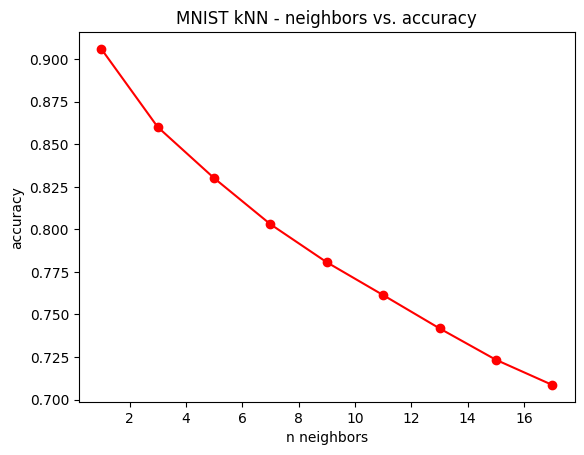

In [ ]:
plt.clf()
plt.plot(n_neighbors, accuracy_val_knn, "-or")
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.title('MNIST kNN - neighbors vs. accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameter = {'n_neighbors':[1,3,5,7,9,11]}
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn,parameter,cv=5)
knn_clf.fit(X_train,y_train)
print(f'评估最合适的K值为：{(knn_clf.best_params_)["n_neighbors"]}',"其准确率为：%.2f"%knn_clf.best_score_)

评估最合适的K值为：1 其准确率为：0.89


In [ ]:
accuracy_test_knn = []
for k in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    accuracy_test_knn.append(accuracy_score(labels,knn_pred))
    print('k={}, KNN Test Data accuracy: {}'.format(k,accuracy_score(labels,knn_pred)))

k=1, KNN Test Data accuracy: 0.37094220110847187
k=3, KNN Test Data accuracy: 0.3545526524148852
k=5, KNN Test Data accuracy: 0.35162311955661124
k=7, KNN Test Data accuracy: 0.3450514647664291
k=9, KNN Test Data accuracy: 0.33784639746635
k=11, KNN Test Data accuracy: 0.33317498020585906
k=13, KNN Test Data accuracy: 0.33079968329374504
k=15, KNN Test Data accuracy: 0.3276326207442597
k=17, KNN Test Data accuracy: 0.3290577988915281


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=92,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_val_pca=pca.transform(X_val)
X_test_pca=pca.transform(X_test)

accuracy_val_knn_pca = []
for k in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    knn_predict=knn.predict(X_val_pca)
    acc = accuracy_score(y_val,knn_predict)
    accuracy_val_knn_pca.append(acc)
    print("k = {}, acc = {}".format(k,acc))

k = 1, acc = 0.8777522740797415
k = 3, acc = 0.8480829720309445
k = 5, acc = 0.8374564311825214
k = 7, acc = 0.82385445889654
k = 9, acc = 0.8141630536427782
k = 11, acc = 0.8033664881407804
k = 13, acc = 0.7939301198673808
k = 15, acc = 0.7852588625350676
k = 17, acc = 0.7802431352546119


In [ ]:
accuracy_test_knn_pca = []
for k in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    knn_pred = knn.predict(X_test_pca)
    accuracy_test_knn_pca.append(accuracy_score(labels,knn_pred))
    print('k={}, KNN Test Data accuracy: {}'.format(k,accuracy_score(labels,knn_pred)))

k=1, KNN Test Data accuracy: 0.5872525732383215
k=3, KNN Test Data accuracy: 0.5933491686460808
k=5, KNN Test Data accuracy: 0.6025336500395883
k=7, KNN Test Data accuracy: 0.6092636579572447
k=9, KNN Test Data accuracy: 0.6152810768012669
k=11, KNN Test Data accuracy: 0.6144101346001584
k=13, KNN Test Data accuracy: 0.6149643705463183
k=15, KNN Test Data accuracy: 0.6149643705463183
k=17, KNN Test Data accuracy: 0.6155977830562154


# Adaboost